In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
def leer_archivo(nombre_archivo):
    """Lee el archivo y devuelve los datos estructurados"""
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()
    
    n, m = map(int, lineas[0].split())
    ids = lineas[1].strip().split()
    datos = np.array([list(map(float, linea.strip().split())) for linea in lineas[2:2+n]])
    
    return n, m, ids, datos

In [4]:
def analizar_correlaciones(datos, ids):
    """Realiza análisis completo de correlaciones espaciales y temporales"""
    # Correlación espacial (entre sensores)
    corr_espacial = np.corrcoef(datos)
    
    # Correlación temporal (autocorrelación con diferentes lags)
    lags = [1, 2, 5, 10]  # Lags temporales a analizar
    autocorrs = {f'Lag_{lag}': [] for lag in lags}
    
    for serie in datos:
        for lag in lags:
            if lag >= len(serie):
                autocorr = np.nan
            else:
                autocorr = np.corrcoef(serie[:-lag], serie[lag:])[0,1]
            autocorrs[f'Lag_{lag}'].append(autocorr)
    
    return corr_espacial, autocorrs

In [28]:
def visualizar_resultados(ids, corr_espacial, autocorrs):
    """Genera visualizaciones profesionales de los análisis"""
    plt.figure(figsize=(25, 10))
    
    # Heatmap de correlaciones espaciales
    plt.subplot(1, 2, 1)
    sns.heatmap(corr_espacial, annot=True, fmt=".2f", cmap='coolwarm',
                xticklabels=ids, yticklabels=ids)
    plt.title('Correlación Espacial entre Sensores')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # Gráfico de autocorrelaciones temporales
    plt.subplot(1, 2, 2)
    for lag in autocorrs:
        sns.kdeplot(autocorrs[lag], label=lag, linewidth=2)
    plt.title('Distribución de Autocorrelaciones Temporales')
    plt.xlabel('Coeficiente de Correlación')
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()
    
    plt.show()

In [6]:
def resumen_estadistico(corr_espacial, autocorrs):
    """Genera un resumen estadístico clave"""
    print("\n=== RESUMEN ESTADÍSTICO ===")
    
    # Estadísticas espaciales
    mascara = ~np.tri(corr_espacial.shape[0], dtype=bool)
    correlaciones = corr_espacial[mascara]
    
    print("\nCorrelación Espacial:")
    print(f"- Media: {np.nanmean(correlaciones):.3f}")
    print(f"- Mediana: {np.nanmedian(correlaciones):.3f}")
    print(f"- % > 0.7: {np.mean(correlaciones > 0.7)*100:.1f}%")
    
    # Estadísticas temporales
    print("\nAutocorrelación Temporal:")
    for lag in autocorrs:
        vals = np.array(autocorrs[lag])
        print(f"\n{lag}:")
        print(f"- Media: {np.nanmean(vals):.3f}")
        print(f"- % > 0.5: {np.mean(vals > 0.5)*100:.1f}%")

🔍 Analizando 240 sensores con 35136 muestras cada uno


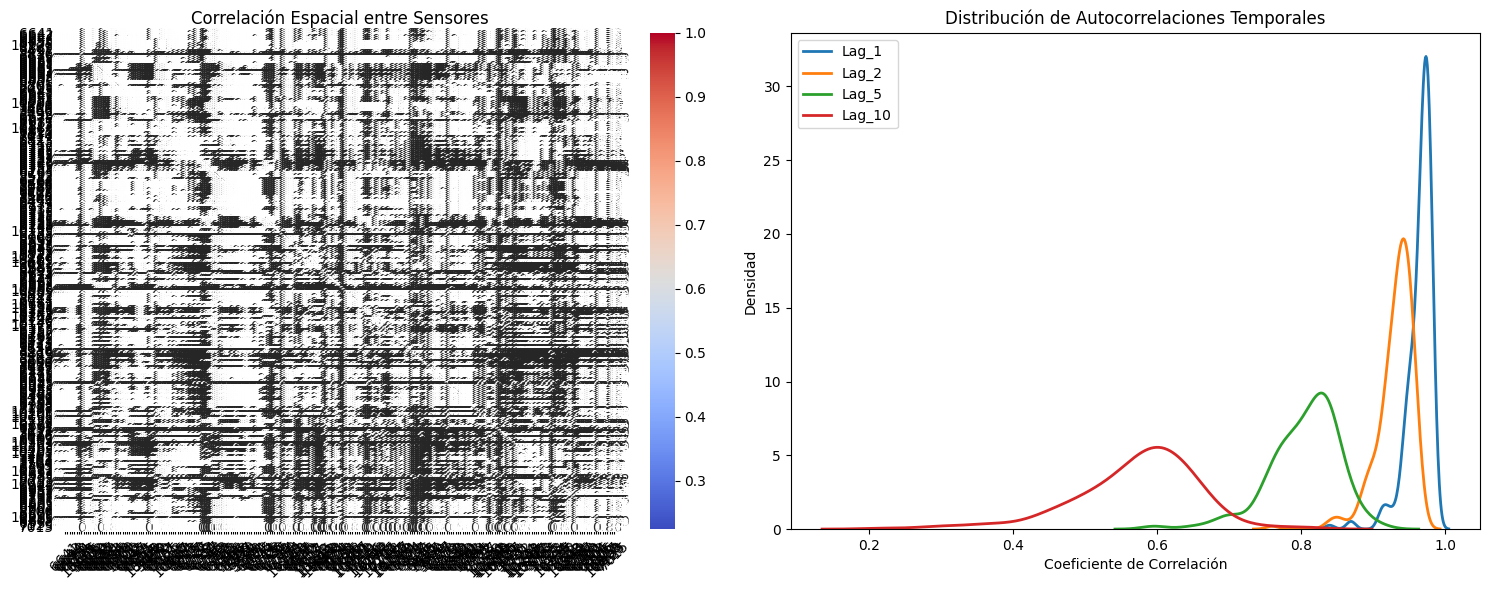


=== RESUMEN ESTADÍSTICO ===

Correlación Espacial:
- Media: 0.815
- Mediana: 0.834
- % > 0.7: 90.3%

Autocorrelación Temporal:

Lag_1:
- Media: 0.964
- % > 0.5: 100.0%

Lag_2:
- Media: 0.931
- % > 0.5: 100.0%

Lag_5:
- Media: 0.804
- % > 0.5: 100.0%

Lag_10:
- Media: 0.572
- % > 0.5: 82.9%


In [7]:
filename = "../procesa_archivos_2024/outputdata_m30_fulldates/archivos_articulo/m30_2024_data_fulldates_intensidad.txt"
n, m, ids, datos = leer_archivo(filename)
print(f"🔍 Analizando {n} sensores con {m} muestras cada uno")

corr_espacial, autocorrs = analizar_correlaciones(datos, ids)
visualizar_resultados(ids, corr_espacial, autocorrs)
resumen_estadistico(corr_espacial, autocorrs)

In [24]:
print(ids)

['6641', '6642', '6644', '6648', '6650', '6654', '10175', '3799', '6666', '3491', '3816', '6672', '6679', '6680', '6683', '6685', '6687', '6689', '6691', '6693', '6694', '6695', '6698', '6699', '6700', '3801', '6706', '7013', '6643', '6645', '6647', '6649', '6651', '6655', '10265', '3819', '3800', '3488', '3490', '3492', '6670', '6673', '6677', '6681', '7125', '6813', '10180', '6815', '6817', '7130', '7014', '6713', '3823', '6715', '6717', '6720', '6722', '6725', '6729', '6732', '6734', '6737', '6743', '6746', '6749', '6753', '6758', '6763', '6765', '3532', '3533', '6766', '6768', '3836', '3558', '6769', '3597', '6770', '3598', '3599', '3560', '6771', '3494', '6772', '6775', '6934', '6714', '6716', '6723', '6726', '6730', '6735', '6738', '6739', '6744', '6750', '10179', '6754', '6761', '6948', '3559', '6697', '6816', '6935', '6640', '6652', '6653', '3817', '10172', '10266', '3489', '10662', '3611', '6669', '6668', '3493', '6671', '6674', '7124', '6678', '6682', '6684', '6686', '6688', 

Analizando grupo 1 : ['6641', '6642', '6644', '6648', '6650', '6654', '10175', '3799', '6666', '3491', '3816', '6672', '6679', '6680', '6683', '6685', '6687', '6689', '6691', '6693', '6694', '6695', '6698', '6699', '6700', '3801', '6706', '7013']


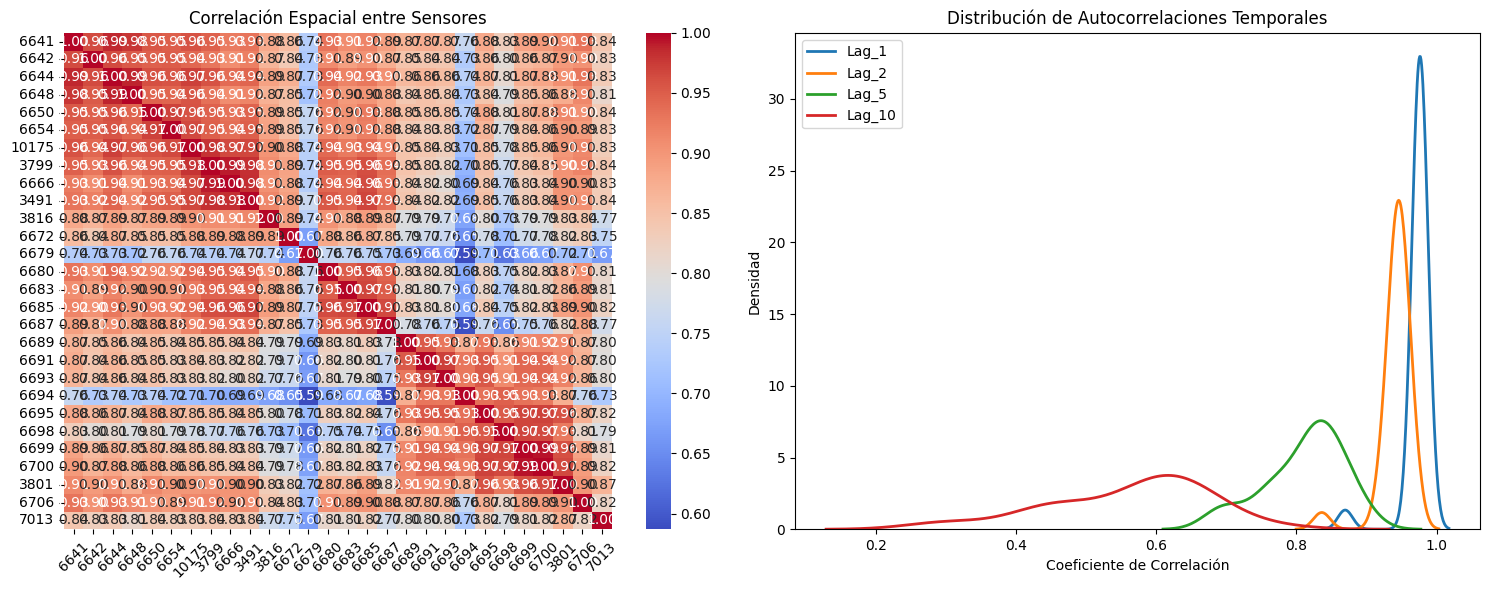


=== RESUMEN ESTADÍSTICO ===

Correlación Espacial:
- Media: 0.858
- Mediana: 0.867
- % > 0.7: 95.0%

Autocorrelación Temporal:

Lag_1:
- Media: 0.973
- % > 0.5: 100.0%

Lag_2:
- Media: 0.942
- % > 0.5: 100.0%

Lag_5:
- Media: 0.811
- % > 0.5: 100.0%

Lag_10:
- Media: 0.560
- % > 0.5: 67.9%
Analizando grupo 2 : ['6643', '6645', '6647', '6649', '6651', '6655', '10265', '3819', '3800', '3488', '3490', '3492', '6670', '6673', '6677', '6681', '7125', '6813', '10180', '6815', '6817', '7130', '7014']


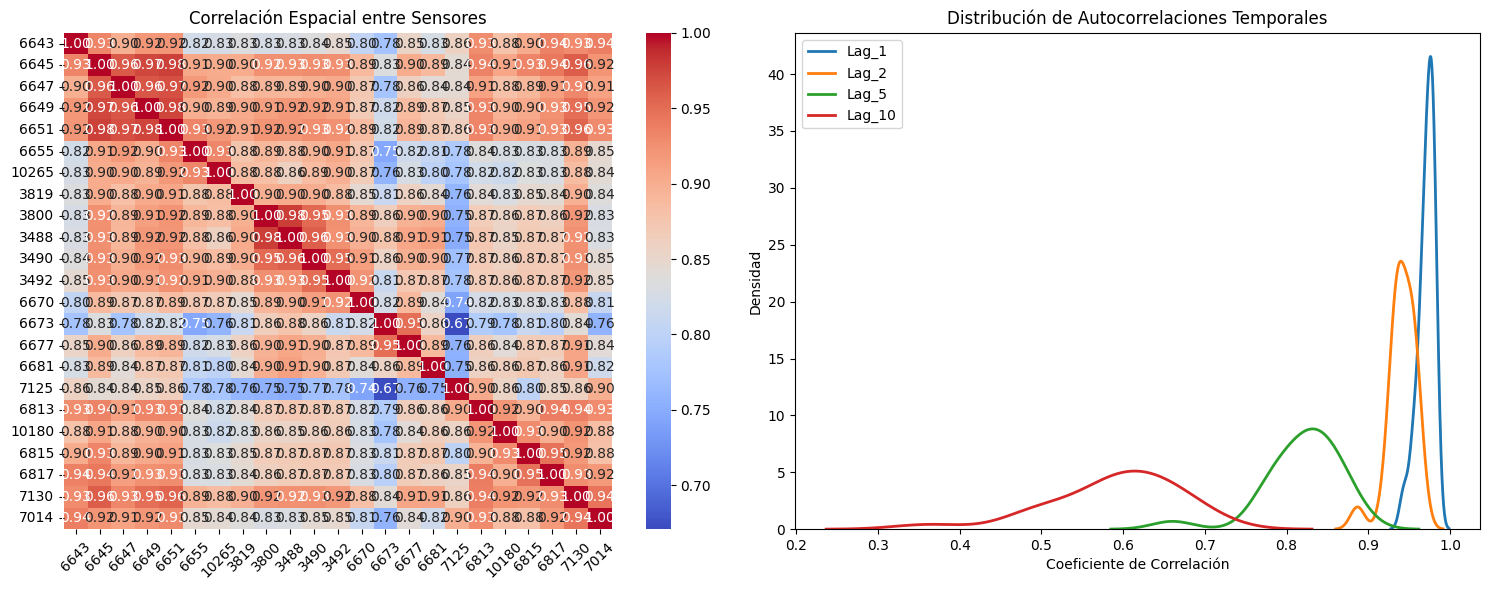


=== RESUMEN ESTADÍSTICO ===

Correlación Espacial:
- Media: 0.876
- Mediana: 0.882
- % > 0.7: 99.6%

Autocorrelación Temporal:

Lag_1:
- Media: 0.971
- % > 0.5: 100.0%

Lag_2:
- Media: 0.941
- % > 0.5: 100.0%

Lag_5:
- Media: 0.819
- % > 0.5: 100.0%

Lag_10:
- Media: 0.589
- % > 0.5: 82.6%
Analizando grupo 3 : ['6713', '3823', '6715', '6717', '6720', '6722', '6725', '6729', '6732', '6734', '6737', '6743', '6746', '6749', '6753', '6758', '6763', '6765', '3532', '3533', '6766', '6768', '3836', '3558', '6769', '3597', '6770', '3598', '3599', '3560', '6771', '3494', '6772', '6775', '6934']


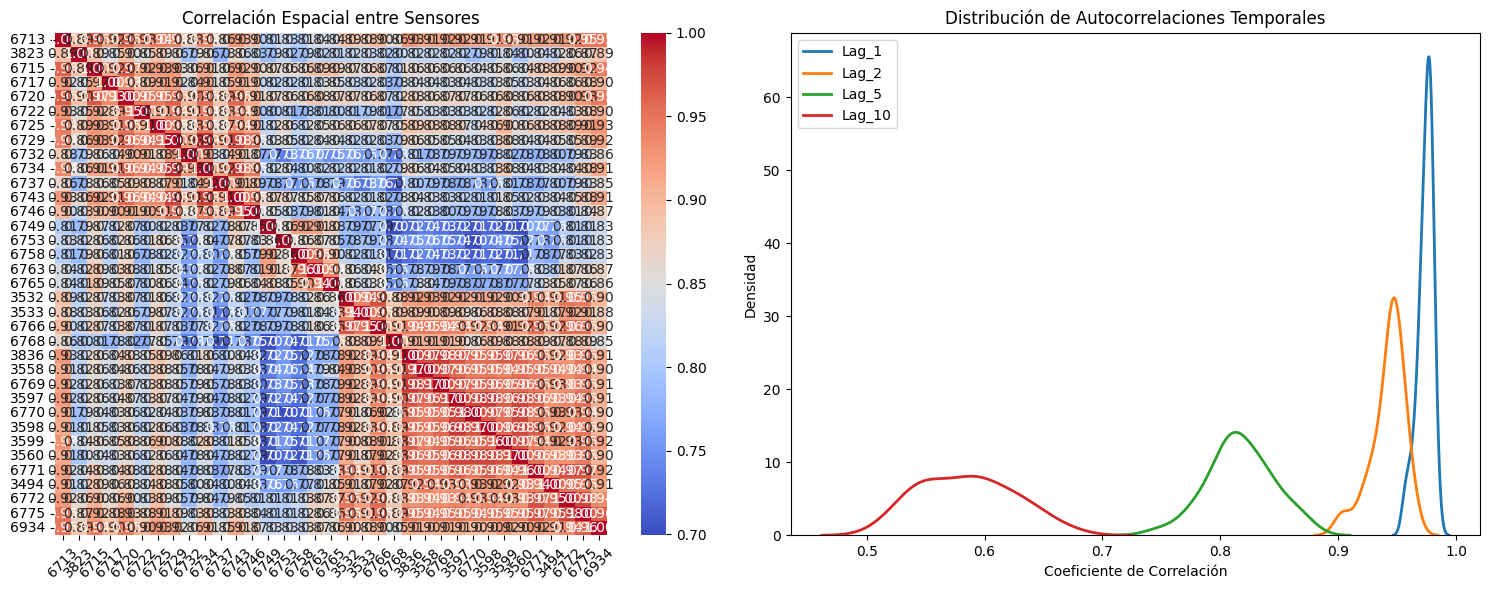


=== RESUMEN ESTADÍSTICO ===

Correlación Espacial:
- Media: 0.861
- Mediana: 0.859
- % > 0.7: 99.8%

Autocorrelación Temporal:

Lag_1:
- Media: 0.974
- % > 0.5: 100.0%

Lag_2:
- Media: 0.942
- % > 0.5: 100.0%

Lag_5:
- Media: 0.817
- % > 0.5: 100.0%

Lag_10:
- Media: 0.585
- % > 0.5: 100.0%
Analizando grupo 4 : ['6714', '6716', '6723', '6726', '6730', '6735', '6738', '6739', '6744', '6750', '10179', '6754', '6761', '6948', '3559', '6697', '6816', '6935']


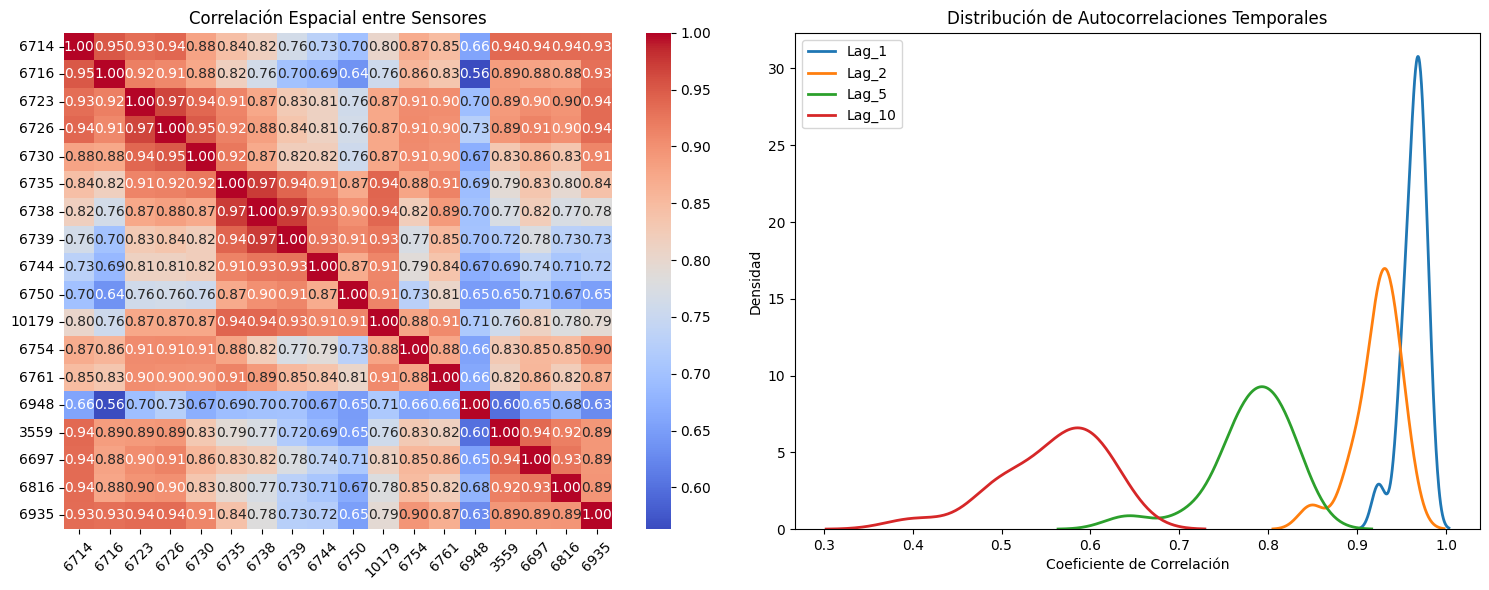


=== RESUMEN ESTADÍSTICO ===

Correlación Espacial:
- Media: 0.828
- Mediana: 0.852
- % > 0.7: 86.3%

Autocorrelación Temporal:

Lag_1:
- Media: 0.964
- % > 0.5: 100.0%

Lag_2:
- Media: 0.923
- % > 0.5: 100.0%

Lag_5:
- Media: 0.780
- % > 0.5: 100.0%

Lag_10:
- Media: 0.556
- % > 0.5: 83.3%
Analizando grupo 5 : ['6640', '6652', '6653', '3817', '10172', '10266', '3489', '10662', '3611', '6669', '6668', '3493', '6671', '6674', '7124', '6678', '6682', '6684', '6686', '6688', '10660', '10659', '6707', '3821', '3822', '6719', '6731', '10661', '6736', '10194', '6740', '6742', '6741', '10267', '6745', '7126', '6748', '10177', '10178', '6755', '6757', '6759', '6760', '6764', '3531', '6774', '3521', '6712', '3837', '3539', '3536', '6819', '3495', '3561', '6667', '3600', '3838', '3839', '6777', '7127', '6778', '6779', '6822', '6780', '6938', '6939', '6942', '6941', '6949', '6950', '6781', '6782', '3496', '6783', '6784', '6785', '6932', '7128', '3797', '10198', '10200', '10201', '10199', '3538', 

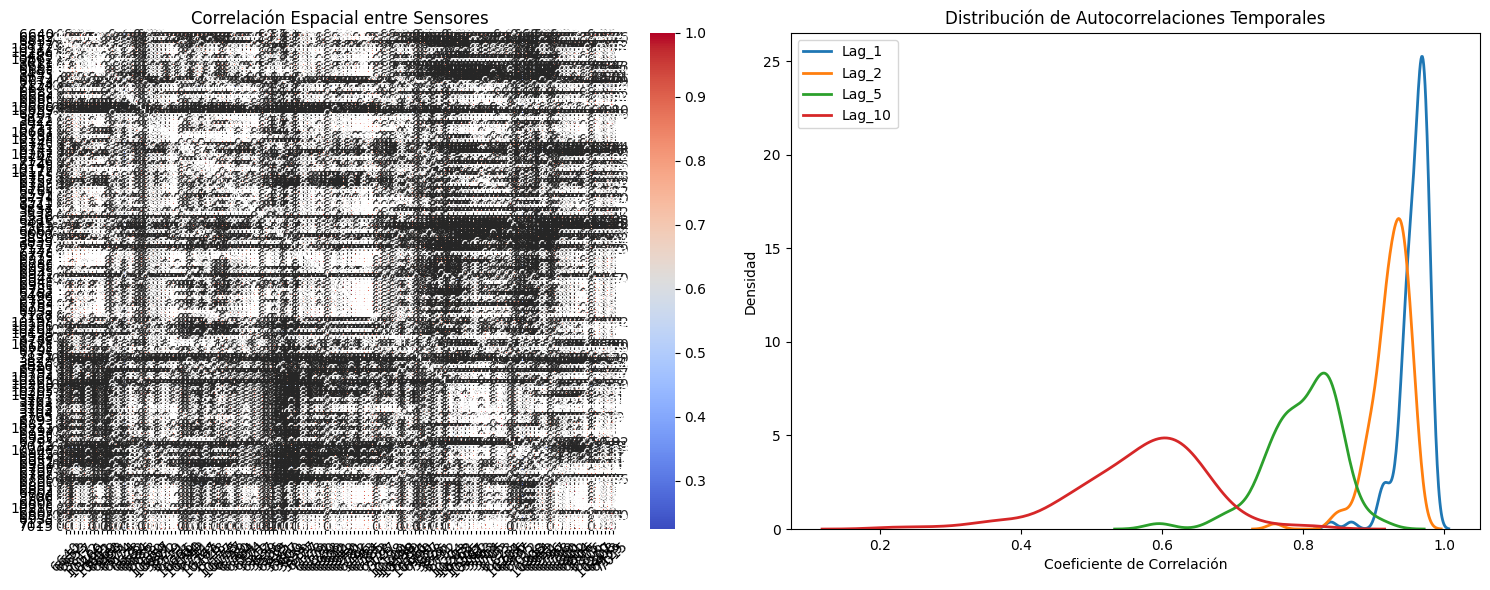


=== RESUMEN ESTADÍSTICO ===

Correlación Espacial:
- Media: 0.791
- Mediana: 0.814
- % > 0.7: 85.7%

Autocorrelación Temporal:

Lag_1:
- Media: 0.959
- % > 0.5: 100.0%

Lag_2:
- Media: 0.924
- % > 0.5: 100.0%

Lag_5:
- Media: 0.800
- % > 0.5: 100.0%

Lag_10:
- Media: 0.570
- % > 0.5: 81.6%


In [27]:
filenameGroups = "../procesa_archivos_2024/outputdata_m30_fulldates/archivos_articulo/m30_2024_ids_estructura_intensidad.txt"
with open(filenameGroups, 'r') as f:
    lineas = f.readlines()
gs = list(map(int, lineas[0].split()))
p = 1
for g in gs:
    idsG = lineas[p].split()
    dataG = []
    for idG in idsG:
        indice = ids.index(idG)
        serie = []
        for x in datos[indice]:
            serie.append(x)
        dataG.append(serie)
    print("Analizando grupo", p, ":", idsG)
    corr_espacial, autocorrs = analizar_correlaciones(dataG, idsG)
    visualizar_resultados(idsG, corr_espacial, autocorrs)
    resumen_estadistico(corr_espacial, autocorrs)
    p += 1
        